# Question 3

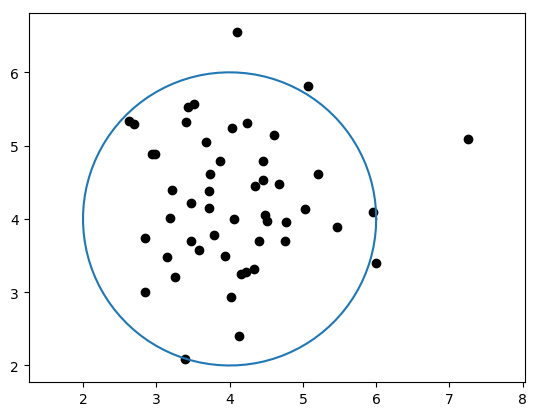

(1.7369758996859839, 7.5456582417341895, 1.7710476950302854, 6.813536786713501)

In [3]:
using PyPlot
X = 4 .+ randn(2,50)
t = range(0,stop=2pi,length=100)
r = 2; x1 = 4; x2 = 4 # center of circle
plot(x1 .+ r*cos.(t), x2 .+ r*sin.(t))
scatter(X[1,:], X[2,:], color="black")
axis("equal")

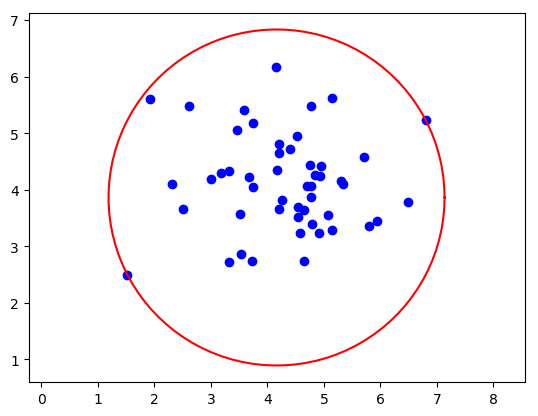

xc:4.1621729696077905
yc:3.8626450432806263
r:2.97315911762189


(0.893269642807669, 7.432573156011681, 0.5925816761960294, 7.132708410365223)

In [6]:
using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, x)   
@variable(m, y)   
@variable(m, R) 

for i in 1:num_points
    @constraint(m, (X[1,i]-x)^2 + (X[2,i]-y)^2 <= R)
end

@objective(m, Min, R)

solve(m)
x = getvalue(x)
y = getvalue(y)
r = sqrt(getvalue(R))
println("xc:", x)
println("yc:", y)
println("r:", r)

plot(x .+ r*cos.(t), y .+ r*sin.(t), color="red")
scatter(X[1,:], X[2,:], color="blue")
axis("equal")